In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
tweets_data_path = 'E:\\Desktop2\\tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet["text"])
    except:
        continue
print(len(tweets_data))


37266


In [20]:
tweets_data[0]

'RT @LizCrokin: Hillary Clinton is going to jail. That’s all. \n\n#QAnon #wwg1wga #thegreatawakening #greatawakening #pizzagate #Pedogate \nhtt…'

In [11]:
import io
file2write=open("E:\\Desktop2\\tweetonly.txt",'w',encoding="utf-8")
#file2write.write(str(tweets_data))
#file2write.close()
for i in range(len(tweets_data)):
    file2write.write(str(tweets_data[i]))
file2write.close()


In [25]:
import re

def clean_tweet(tweet):
   
   
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [26]:
c=[]
for i in range(len(tweets_data)):
    c.append(clean_tweet(tweets_data[i]))
    

In [28]:
file3=open("E:\\Desktop2\\cleaned_tweets.csv",'w')
for i in range(len(c)):
    file3.write(str(c[i])+"\n")
file3.close()


In [45]:
import os
import codecs
from sklearn import feature_extraction
import mpld3
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manju\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [47]:
stop_words = nltk.corpus.stopwords.words('english')
token=[]
for i in range(len(c)):
   word_tokens = word_tokenize(c[i])
   #filtered_sentence = [w for w in word_tokens if not w in stop_words]
   #print(word_tokens)
   token.append(word_tokens)
   #To tokenize each tweet
#print(token[0])


In [48]:
filtered=[]
#print(len(token))
for i in range(len(token)):
   filtered_sentence = [w for w in token[i] if not w in stop_words]
   filtered.append(filtered_sentence)
print(filtered)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



word2vec model


In [50]:
from gensim.models import Word2Vec


C:\Users\Manju\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [51]:
model = Word2Vec(filtered, min_count=3,size=200,      # Dimensionality of word embeddings
                 workers=2,     # Number of processors (parallelisation)
                 window=5,      # Context window for words during training
                 iter=30)
print(model)

Word2Vec(vocab=5777, size=200, alpha=0.025)


In [52]:
words = list(model.wv.vocab)
print(words)


['RT', 'Hillary', 'Clinton', 'going', 'jail', 'That', 'QAnon', 'wwg1wga', 'thegreatawakening', 'greatawakening', 'pizzagate', 'Pedogate', 'htt', 'Russia', 'listening', 'I', 'hope', 'able', 'find', '30', '000', 'emails', 'missing', 'You', 'Prison', 'Traito', 'Was', 'Don', 'Jr', 'expecting', 'Trump', 'Tower', 'meeting', 'blocked', 'tweeted', 'amp', 'Democrats', 'colluded', 'w', 'Russians', 'fix', '2016', 'election', 'Can', 'sup', '2018', 'Losses', 'Pile', 'Up', 'For', 'The', 'Bernie', 'Sanders', 'Wing', 'Of', 'Democratic', 'Party', 'There', 'evidence', 'whatsoever', 'Donald', 'campaign', 'involved', 'kind', 'collusion', 'history', 'FBI', 'way', 'sure', 'bringing', 'WHEN', 'THAT', 'OUT', 'TO', 'BE', 'A', 'S', 'WHAT', 'SIR', 'HILLARY', 'Turned', 'phone', 'morning', 'first', 'thing', 'see', 'Sen', 'citing', 'new', 'story', 'ht', 'identified', '23', 'Republican', 'districts', 'defeated', 'general', 'Prime', 'MEDIA', 'BIAS', 'Socialist', 'wins', 'consistently', 'attributed', '76yo', 'white', 

In [53]:
print(model['Hillary'])


[-2.746928   -0.9960812  -0.07174514 -0.4721528  -2.3710403   0.7000333
 -0.6766256  -1.5948696  -3.0057507  -0.51014584  0.36871162 -0.837365
  0.69808596  1.3377646   0.76402485 -0.9375848  -0.6899604   1.2097615
 -2.8304977   1.3805568  -0.10079116 -0.63230646 -3.0565884   0.4437465
 -0.16272978 -0.5645704  -2.5201395   2.2122843  -1.1010783   0.84305465
 -1.4346646   1.4822744   0.13994975 -0.20348385  1.3078853   1.3588105
  0.25441498 -0.69953334  0.7342153   0.64456517  2.13899     1.8486842
 -0.1593488   1.3346492   1.1538563   0.75423694 -2.723864    1.0392447
  1.42997    -0.8880821  -0.6346623  -0.832676   -0.14565559 -0.49509552
 -1.051775    0.8854687   0.23565954 -0.7433698   0.35019785 -0.03065342
 -0.42603946 -1.5663987  -1.6171312   1.9951319   2.426134   -1.3348225
 -0.8220269  -0.21745005 -1.6357114  -2.0745842  -0.08670262 -1.2668706
  0.0519578  -0.26833612 -2.4504125   0.37470967  1.0527992   0.02926462
  1.4507905   0.06073862  0.9019668  -1.0834389   1.8691784  

C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [55]:
model.save('model.bin')

In [57]:
new_model = Word2Vec.load('model.bin')
print(new_model)
X = model[model.wv.vocab]
model.most_similar('Hillary')


Word2Vec(vocab=5777, size=200, alpha=0.025)


C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
C:\Users\Manju\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('RT', 0.4307841956615448),
 ('charges', 0.39964568614959717),
 ('0', 0.35016879439353943),
 ('either', 0.3213607668876648),
 ('resulting', 0.3021034598350525),
 ('30', 0.2930229902267456),
 ('congress', 0.29113516211509705),
 ('deemed', 0.27619290351867676),
 ('Cash', 0.26582810282707214),
 ('Trump', 0.2539430260658264)]

In [58]:
import numpy as np
vec=[]
for word in words:
    vector = model[word]
    vec.append(vector)
#arr=np.array(vec)
print(vec)

C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



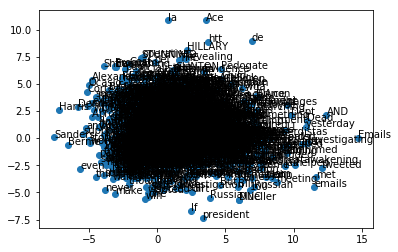

In [59]:
from sklearn.decomposition import PCA


# In[95]:


pca = PCA(n_components=2)
result = pca.fit_transform(X)


# In[105]:


plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [60]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 4, 4, 1, 4, 0, 1, 0, 0, 4, 1, 1, 1, 4, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 3, 0, 0, 2, 0, 0, 2, 2, 0, 3, 1, 4, 4, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 3, 3, 1, 1, 1, 4, 4, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 2, 4, 3, 4, 4, 0, 2, 4, 2, 2, 2, 2, 3, 1, 1, 4, 4, 4, 4, 4, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 4, 1, 2, 1, 1, 0, 2, 3, 3, 1, 1, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 0, 1, 0, 2, 0, 0, 2, 2, 4, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 4, 2, 0, 2, 2, 2, 2, 3, 0, 2, 4, 4, 4, 4, 2, 4, 3, 2, 4, 4, 2, 0, 4, 0, 1, 4, 4, 4, 0, 4, 2, 0, 1, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 1, 1, 1, 1, 2, 3, 3, 1, 4, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 3, 2, 0, 4, 4, 

In [62]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

RT:0
Hillary:0
Clinton:0
going:0
jail:0
That:0
QAnon:0
wwg1wga:0
thegreatawakening:0
greatawakening:0
pizzagate:2
Pedogate:2
htt:2
Russia:0
listening:2
I:4
hope:4
able:1
find:4
30:0
000:1
emails:0
missing:0
You:4
Prison:1
Traito:1
Was:1
Don:4
Jr:1
expecting:0
Trump:0
Tower:0
meeting:0
blocked:4
tweeted:0
amp:0
Democrats:0
colluded:0
w:0
Russians:0
fix:0
2016:0
election:0
Can:0
sup:1
2018:3
Losses:3
Pile:3
Up:3
For:0
The:1
Bernie:3
Sanders:3
Wing:3
Of:1
Democratic:3
Party:3
There:0
evidence:0
whatsoever:2
Donald:0
campaign:0
involved:2
kind:2
collusion:0
history:3
FBI:1
way:4
sure:4
bringing:4
WHEN:2
THAT:2
OUT:2
TO:2
BE:2
A:3
S:2
WHAT:2
SIR:2
HILLARY:2
Turned:2
phone:2
morning:2
first:4
thing:4
see:4
Sen:3
citing:3
new:1
story:1
ht:1
identified:4
23:4
Republican:0
districts:0
defeated:0
general:0
Prime:1
MEDIA:2
BIAS:2
Socialist:3
wins:3
consistently:3
attributed:3
76yo:3
white:3
man:4
future:3
spent:0
nearly:1
1:1
3:1
days:1
president:1
property:1
4:1
golf:1
p:1
Have:4
guys:4
watching

oath:0
leaked:1
information:0
Meanwhile:2
CIA:1
Intel:3
heads:4
military:4
targets:2
ignores:2
fingering:0
praising:4
putin:4
Show:2
Duped:1
twisted:3
da:4
attacked:4
everything:4
planet:4
com:1
agree:4
DonaldTrump:0
several:4
belongs:4
GITMO:4
cohorts:4
slaps:1
sanctions:1
regime:1
chemical:2
weapons:2
Salisbury:2
Key:2
ques:2
Congratulations:2
Gregg:2
Jarrett:2
RUSSIA:2
HOAX:2
ILLICIT:2
SCHEME:2
CLEAR:2
FRAME:2
likely:4
nominee:4
food:4
thought:4
Seriously:1
popular:4
almost:4
votes:0
Further:3
endorsements:3
american:4
wants:3
Official:1
Job:2
Network:2
hey:4
funny:4
nuance:4
R:1
wrote:4
response:3
comment:4
regarding:4
third:4
November:0
actively:4
idiot:4
killing:4
life:4
Florida:2
Rep:2
Stephen:2
Lynch:2
Destroys:0
Republicans:0
Only:0
Russi:2
FACTCHECK:1
events:1
ALONE:2
aka:2
conspiring:2
po:2
course:4
implying:3
stands:4
Special:1
Counsel:1
complete:4
argue:3
ICE:1
Employee:0
Forced:3
Out:0
Using:3
Position:0
Campaign:0
healthcare:1
send:4
college:4
stuck:4
dummies:4
Stossel:3

Piece:3
Amount:2
Money:2
locked:4
fiftyeight:4
taylor:4
Ok:4
honestly:4
relationship:4
Pretty:3
simpl:3
Wait:4
Release:1
taxes:4
Bet:1
gave:4
asset:4
RedWaveRising:2
HillaryForPrison:2
Hillar:4
Another:0
crap:4
investigations:4
transparent:4
slave:4
Jail:4
Judging:1
fired:3
26:1
29:3
Longtime:1
adviser:2
Roger:1
Stone:1
sought:1
refer:4
3rd:1
fool:4
3C:1
TRUTH:1
Deripaska:1
WORKS:1
WORKED:1
Chris:1
Conspiracy:4
PR:2
Zin:4
Getting:4
Dude:0
Interview:2
closing:1
stand:4
woods:4
became:2
openly:4
OurRevolution:3
becoming:4
1st:4
preferred:1
mate:0
indicate:1
desperate:4
welcome:3
Cheney:1
ethics:2
speechwriters:2
etc:1
Koch:3
Blah:2
blah:2
micropenis:2
discussion:4
starts:4
pretending:4
care:4
payments:4
Cause:4
treason:4
angry:4
oh:4
executed:0
DID:2
Uranium:1
deal:4
Instead:1
extensively:2
reported:2
interviewed:2
Re:4
coast:3
cnn:4
ready:4
predict:3
donald:1
house:4
ads:4
TV:4
Hilary:4
falsely:1
upon:4
Wake:4
little:4
EVERYTHING:4
ObamaDay:2
laptop:1
LoveTrumpsHate:2
Standards:4
looks:

treatment:1
torchbearers:3
flame:3
blitz:3
faltered:3
primaries:3
crossed:4
dotted:2
exist:4
months:1
Rothschild:2
Dick:3
humiliating:3
russians:4
pre:4
Fuzzbutt:1
ille:0
Limbaugh:2
CrazyBernie:3
SocialismKills:1
genius:3
crash:4
Enjoy:4
thi:4
Tweet:4
mu:4
elan:4
MULTIPLE:3
regards:4
Luntz:0
allow:4
strongly:0
suggest:4
explaining:4
Die:3
der:2
den:2
late:1
Law:0
handled:1
consider:3
ZERO:3
CEO:1
struggle:4
tied:3
walking:4
Those:1
believable:1
coup:2
framed:2
Worthless:3
rose:2
experience:4
turn:4
honored:3
announce:3
reelection:2
hammer:2
drop:3
KAG2020:2
ways:4
seriously:4
thus:4
docu:2
Conspiring:0
usa:2
discovered:1
Public:1
Sec:1
theory:4
Liberal:3
abt:4
Dir:1
700:1
named:4
April:4
POS:4
answered:4
19:4
statistical:2
Despite:0
ftw:2
finding:3
normal:4
Check:3
sit:4
Rajinikanth:3
SAME:2
GOOD:2
fine:4
Collins:4
blocking:0
nail:4
line:1
lazy:1
pundits:3
civil:4
Jollett:4
remain:3
ignorant:3
General:1
Marijuana:3
SUMPAH:3
mess:0
HillaryClintonNOW:0
Baby:1
hard:4
previous:2
external:3

didMargaret:4
believed:4
murdering:2
babies:4
TinyLivesAtSt:2
Fact:3
kinda:4
Wonder:4
Jeckle:2
pop:4
march:1
24th:1
citizens:4
waste:4
bogus:4
Sa:4
Bring:3
warpath:3
bounds:3
Hogg:3
uses:4
extreme:4
BOTH:2
ONE:2
DIFFERENCE:1
grifter:3
hater:3
stumping:3
bow:3
ta:4
complains:4
grandparents:4
Stock:4
market:1
correction:3
INVESTIGATE:2
CORRUPTION:2
excited:4
violence:4
Marxists:3
masquerading:2
SpaceForce:4
Preparing:3
SAD:4
tactics:4
Administration:4
Taylor:3
advocate:4
Honor:4
folder:4
bug:2
phones:2
SPECIAL:1
progress:4
bone:4
Indeed:4
Hasn:3
Breitbart:1
confluence:2
alliances:2
bag:4
Thats:2
DEMOCRATS:2
BACK:2
threats:2
episode:3
interminable:3
Violent:1
Volcanic:1
Sexist:2
Against:4
AGREE:2
SpyGate:2
prior:1
loudly:4
posts:3
celebrating:4
nos:2
np:3
recruited:3
female:3
efforts:4
acid:1
washing:1
33k:1
mails:2
95:1
King:4
tape:3
effects:4
services:3
chair:2
obtain:1
Pussy:3
anonymous:2
Isn:4
serve:4
verified:4
LA:2
YO:2
QUE:2
Pocahontas:1
Looking:4
kill:4
Farage:2
board:1
ar:4
DUMB:

Eu:3
quero:3
mais:3
congressistas:3
envaram:2
carta:2
embaixada:2
Spectre:3
Sean:2
Penn:3
reopened:2
oligarch:1
seller:1
investigatio:2
OVER:2
Unfortunately:4
cookies:1
Butter:2
revealing:2
Named:4
offices:4
Hahahaha:2
hahahaha:2
concoct:1
EXPLAINS:2
advisor:3
evaluation:3
installed:4
roads:3
Mata:4
privilege:3
hes:1
37:1
Christmas:3
complain:4
hillaryclinton:4
inaugural:0
tells:4
Investigating:0
ENTRAP:2
Donut:2
bein:0
lightweight:4
wrkngclssher0:3
bombing:3
Speaking:1
sexting:2
Parentho:2
crack:4
konski:4
innovative:4
borders:4
Almost:1
Huntsman:3
Adios:4
Daddy:1
staffer:3
WORKER:3
YEAR:2
eliminate:3
highlights:3
monetizing:2
conti:2
whaaaa:2
Betwee:2
MARCH:1
Skippy:1
03:1
privately:2
Apparent:0
Plastic:2
Bag:2
Definitely:4
puede:2
reconstruir:2
mientras:2
casi:2
billones:2
camino:2
sabandija:2
Ruth:2
Bader:2
85:4
served:3
project:4
launch:1
Soapbox:3
Sell:3
Disease:3
classifi:4
volumes:1
1100:1
VoterFraud:3
IfYouSeeSomethingSaySomething:2
contain:1
FreeStuff:2
UNBELIEVABLE:2
NEGOTIA

In [66]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[0 0 0 ... 0 0 0]
Centroids data
[[ 1.06987469e-01 -4.26365696e-02  3.90723646e-02 -7.81664401e-02
   1.08011685e-01 -7.23583251e-03  1.17870599e-01 -5.18081449e-02
  -4.16201837e-02 -1.17490299e-01 -3.09433043e-02  1.73738021e-02
  -2.39247829e-03 -6.73615932e-02 -6.73181266e-02  5.88113554e-02
   1.47612154e-01  4.66496423e-02  6.65336624e-02 -2.62575466e-02
   1.37009658e-02 -5.64507619e-02  1.39412433e-01 -4.78404462e-02
   3.60298455e-02  7.63890892e-02  5.87383583e-02 -6.17986023e-02
  -2.50490569e-02 -6.30673692e-02  6.02310486e-02 -4.41009589e-02
   1.88024312e-01 -1.91038065e-02  4.47834283e-02  9.71911103e-03
   6.10416643e-02 -8.15822333e-02 -7.54719600e-03  4.56696153e-02
  -3.50933895e-02 -1.02216981e-01 -6.12735488e-02 -4.01442498e-03
  -9.03826505e-02  7.55578130e-02  1.19204745e-02  7.09893927e-03
  -3.84512916e-02  8.18281621e-02 -1.06013082e-02 -2.13818140e-02
  -1.90750249e-02  8.05793479e-02  1.39504686e-01  8.74881521e-02
  -6.20

C:\Users\Manju\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Silhouette_score: 
0.29766735


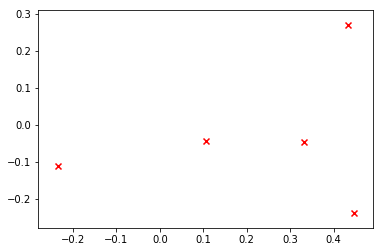

In [70]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]


In [73]:
for i in range(5):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Cluster 0 words:

NameError: name 'vocab_frame' is not defined